In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [3]:
df_train_set  = pd.read_csv('data/trainingValues.csv', index_col='id')
df_train_labels  = pd.read_csv('data/trainingLabels.csv', index_col='id')

df_test  = pd.read_csv('data/testValues.csv', index_col='id')

In [4]:
label_vc = df_train_labels['status_group'].value_counts()
label_vc

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

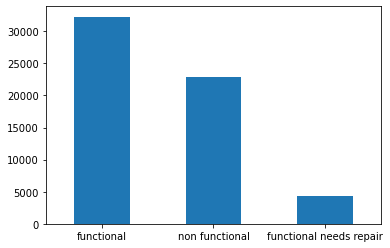

In [5]:
ax = label_vc.plot.bar(rot=0)

In [6]:
df = df_train_set.join(df_train_labels)
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [10]:
coord_df = df[(df['longitude']!=0)][['longitude', 'latitude', 'status_group']]

# coord_df.plot.scatter('longitude', 'latitude', 'status_group')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

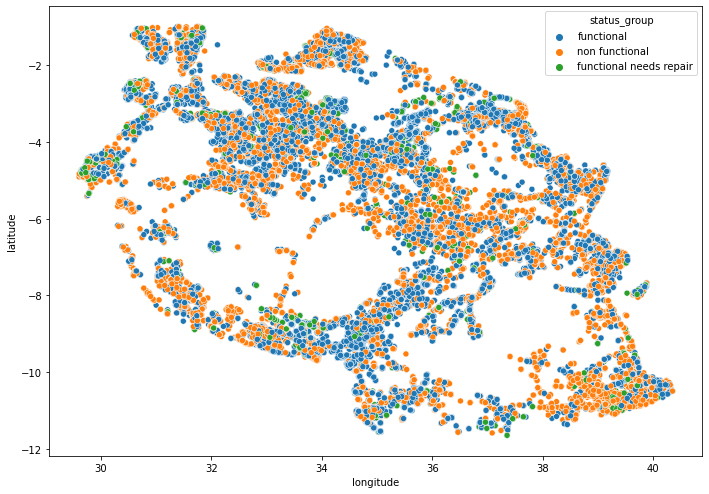

In [11]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.scatterplot(data=coord_df, x="longitude", y="latitude", hue="status_group", legend="full")

In [12]:
cols_with_none = df.isnull().sum()
cols_with_none = cols_with_none[cols_with_none>0]
cols_with_none

funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

<AxesSubplot:>

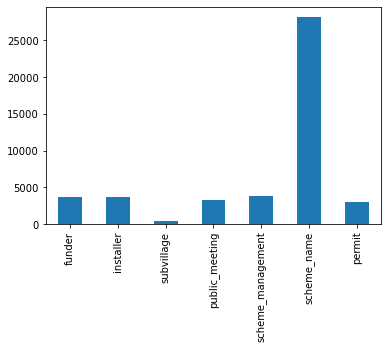

In [13]:
cols_with_none.plot.bar()

In [14]:
df_corr = df[cols_with_none.index].isnull()#.corr()
df_matrix = df_corr.corr()
df_matrix

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
funder,1.000000,0.981590,-0.020241,-0.001839,-0.054385,0.009758,0.709333
installer,0.981590,1.000000,-0.020300,0.002086,-0.050929,0.009385,0.705604
subvillage,-0.020241,-0.020300,1.000000,-0.018404,-0.014028,-0.071433,-0.018463
public_meeting,-0.001839,0.002086,-0.018404,1.000000,0.058156,0.110900,0.032935
scheme_management,-0.054385,-0.050929,-0.014028,0.058156,1.000000,0.236499,-0.048891
scheme_name,0.009758,0.009385,-0.071433,0.110900,0.236499,1.000000,-0.045035
permit,0.709333,0.705604,-0.018463,0.032935,-0.048891,-0.045035,1.000000


Text(0.5, 1.0, 'Corr')

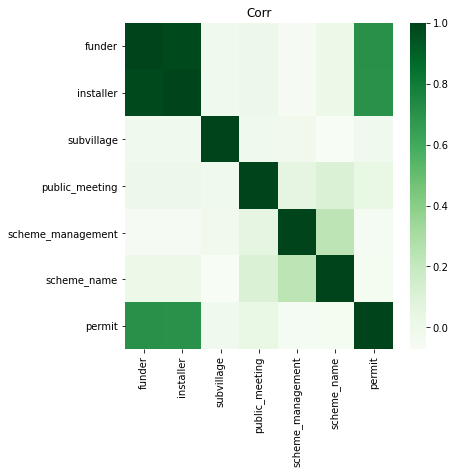

In [15]:
fig = plt.figure(figsize=(6,6))
r = sns.heatmap(df_matrix, cmap="Greens")
r.set_title("Corr")

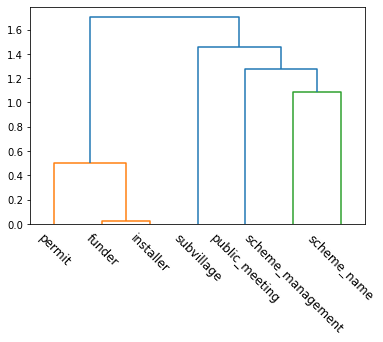

In [16]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(df_matrix, 'single')

plt.figure()

dn = hierarchy.dendrogram(Z, labels=df_matrix.columns, leaf_rotation=-45)

<AxesSubplot:xlabel='quantity_group'>

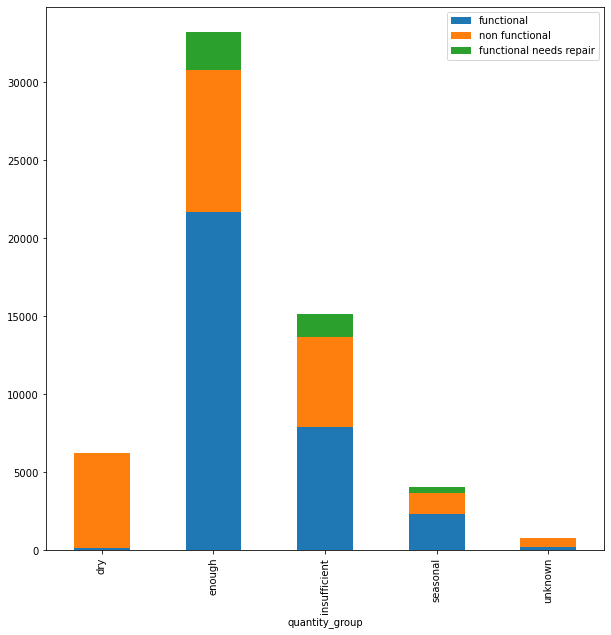

In [20]:
df_quantity = df[['quantity_group']].join(pd.get_dummies(df['status_group'])).groupby(
    'quantity_group')[df['status_group'].unique()].apply(sum)

df_quantity.plot.bar(stacked=True, figsize=(10, 10))

<AxesSubplot:xlabel='quality_group'>

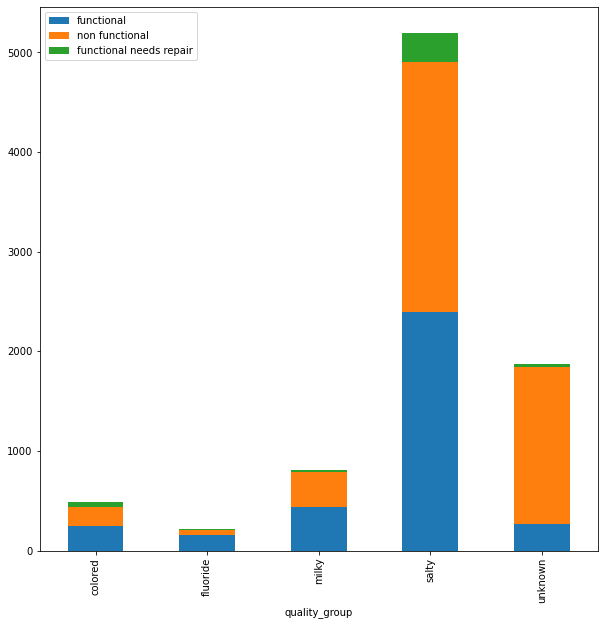

In [21]:
df_quality = df[['quality_group']].join(pd.get_dummies(df['status_group'])).groupby(
    'quality_group')[df['status_group'].unique()].apply(sum)
df_quality.drop('good', axis=0, inplace=True)

df_quality.plot.bar(stacked=True, figsize=(10, 10))

<AxesSubplot:xlabel='waterpoint_type_group'>

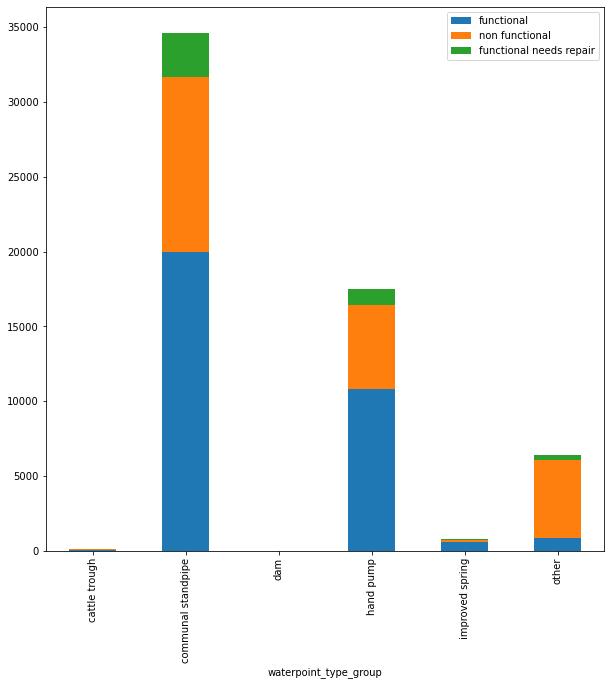

In [22]:
df_waterpoint = df[['waterpoint_type_group']].join(pd.get_dummies(df['status_group'])).groupby(
    'waterpoint_type_group')[df['status_group'].unique()].apply(sum)

df_waterpoint.plot.bar(stacked=True, figsize=(10, 10))

<AxesSubplot:ylabel='construction_year'>

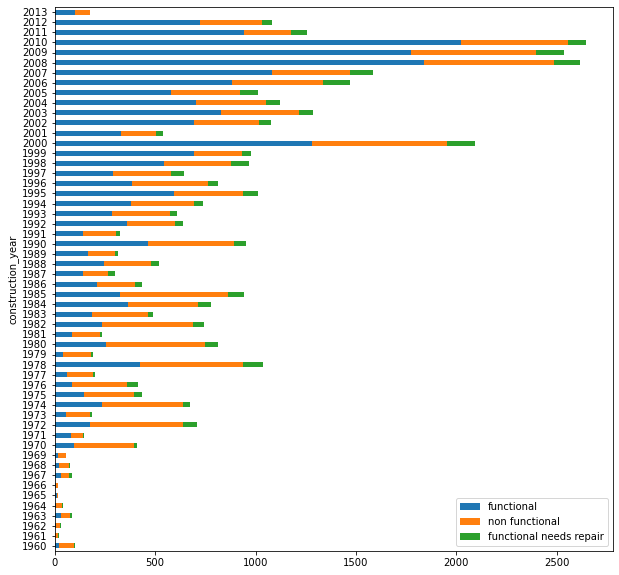

In [24]:
df['construction_year'] = df['construction_year'].astype(str)
df_year = df[['construction_year']].join(pd.get_dummies(df['status_group'])).groupby(
    'construction_year')[df['status_group'].unique()].apply(sum)
df_year.drop("0", axis=0, inplace=True)

df_year.plot.barh(stacked=True, figsize=(10, 10))

<AxesSubplot:ylabel='top_funder'>

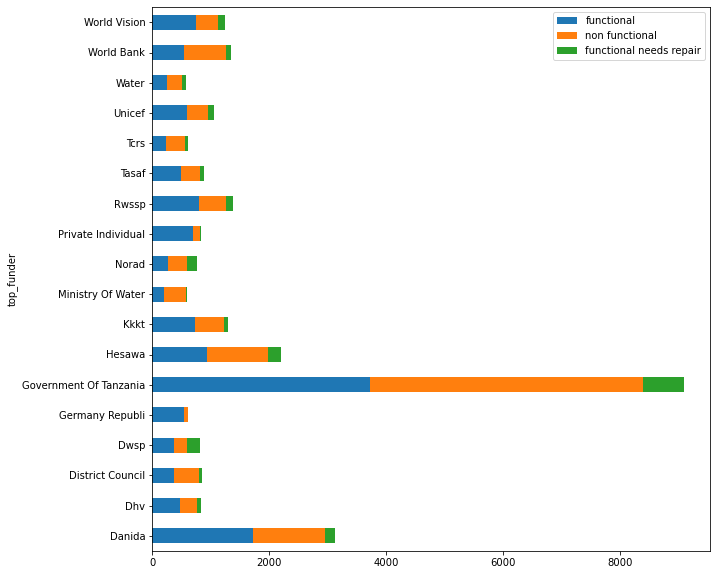

In [26]:
top_funder = df['funder'].value_counts().head(19).index.tolist()
df['top_funder'] = df['funder'].apply(lambda x: x if x in top_funder else 'other')
df_funder = df[df['top_funder'].isin(top_funder)][['top_funder']].join(
    pd.get_dummies(df[df['top_funder'].isin(top_funder)]['status_group'])).groupby(
    'top_funder')[df['status_group'].unique()].apply(sum)
df_funder.drop("0", axis=0, inplace=True)

df_funder.plot.barh(stacked=True, figsize=(10, 10))

<AxesSubplot:ylabel='basin'>

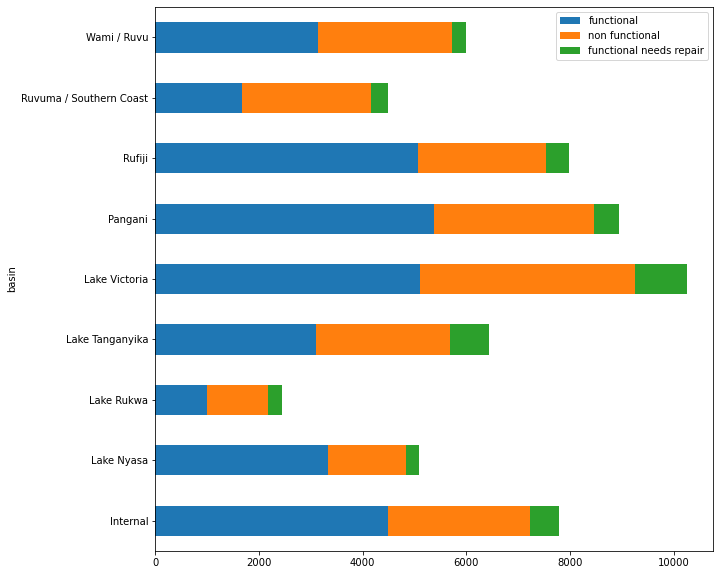

In [27]:
df_basin = df[['basin']].join(
    pd.get_dummies(df['status_group'])).groupby(
    'basin')[df['status_group'].unique()].apply(sum)

df_basin.plot.barh(stacked=True, figsize=(10, 10))